In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv


<Figure size 1152x432 with 0 Axes>

In [2]:
data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv')
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [3]:
data.describe()

,Sno,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,860.000000,454.596859,10.441536,44.361838
std,496.376873,3712.529032,106.638286,351.078713
min,1.000000,0.000000,0.000000,0.000000
25%,430.500000,2.000000,0.000000,0.000000
50%,860.000000,12.000000,0.000000,0.000000
75%,1289.500000,109.000000,0.000000,7.000000
max,1719.000000,59989.000000,1789.000000,7862.000000


In [4]:
data.describe(include="O")

,Date,Province/State,Country,Last Update
count,1719,1257,1719,1719
unique,27,61,34,520
top,02/15/2020 22:00:00,Guangxi,Mainland China,01/31/2020 19:00:00
freq,75,27,801,63


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 107.6+ KB


In [6]:
data.isna().sum()

Sno                 0
Date                0
Province/State    462
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

<h1> **EDA** </h1>

Excluding country name Others

In [7]:
data=data[data.Country!='Others']
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


[](http://)Extracting Date and Time from the 'Last Update' column

In [8]:
data["Date"] = pd.to_datetime(data["Date"])

In [9]:
data['Last Update'] = pd.to_datetime(data['Last Update'])
data['Last Update'].head()

0   2020-01-22 12:00:00
1   2020-01-22 12:00:00
2   2020-01-22 12:00:00
3   2020-01-22 12:00:00
4   2020-01-22 12:00:00
Name: Last Update, dtype: datetime64[ns]

Checking Date-wise Trend of confirmed patients and number of death

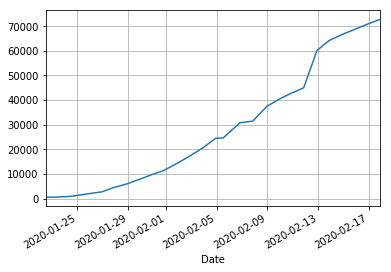

In [10]:
data.groupby('Date').sum()['Confirmed'].plot()
plt.grid()

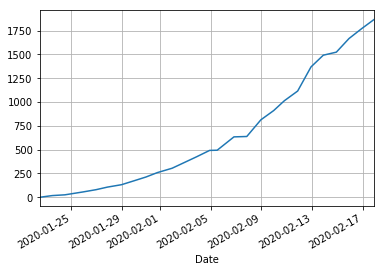

In [11]:
data.groupby('Date').sum()['Deaths'].plot()
plt.grid()

Country-wise Distribution

In [12]:
country_count = data['Country'].value_counts().reset_index()
country_count = country_count.rename(columns={"index": "Country", "Country": "Count"})
country_count.head()

,Country,Count
0,Mainland China,801
1,US,188
2,Australia,84
3,Canada,59
4,China,34


In [13]:
country_count = pd.DataFrame(data.groupby('Country')['Confirmed'].max()).reset_index()
country_count.head()

,Country,Confirmed
0,Australia,5.0
1,Belgium,1.0
2,Brazil,0.0
3,Cambodia,1.0
4,Canada,5.0


In [14]:
country_count_wo_mc=country_count[country_count.Country != 'Mainland China']
country_count_wo_mc.head()

,Country,Confirmed
0,Australia,5.0
1,Belgium,1.0
2,Brazil,0.0
3,Cambodia,1.0
4,Canada,5.0


In [15]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = country_count_wo_mc.Country,values = country_count_wo_mc.Confirmed)])
fig.update_layout(title="Country-wise distribution except Mainland China")
fig.show()

In [16]:
state_count = pd.DataFrame(data[data['Country']=='Mainland China'].groupby('Province/State').max()['Confirmed']).reset_index()
fig = go.Figure(data = [go.Pie(labels = state_count['Province/State'],values = state_count.Confirmed)])
fig.update_layout(title="State-wise distribution of Mainland China")
fig.show()

Growth trend of Corona virus in each Country individually except Mainland China

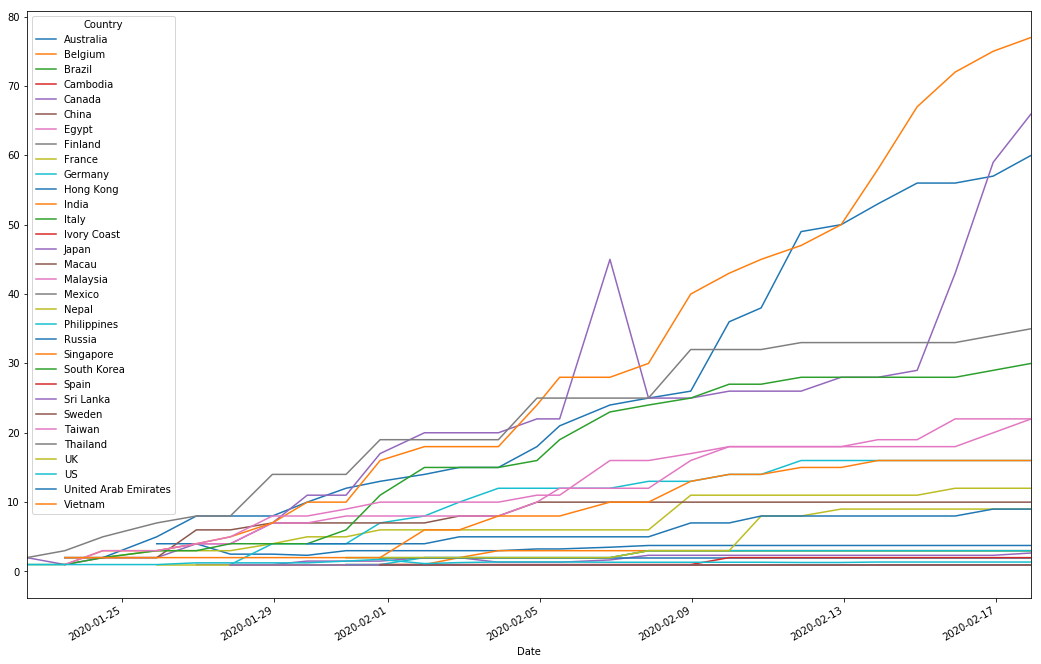

In [17]:
growth_country = pd.pivot_table(data[data.Country!='Mainland China'], values='Confirmed', columns='Country', index='Date')
growth_country.plot(figsize=(18,12))

Growth trend of Corona virus in each Province/State of Mainland China individually

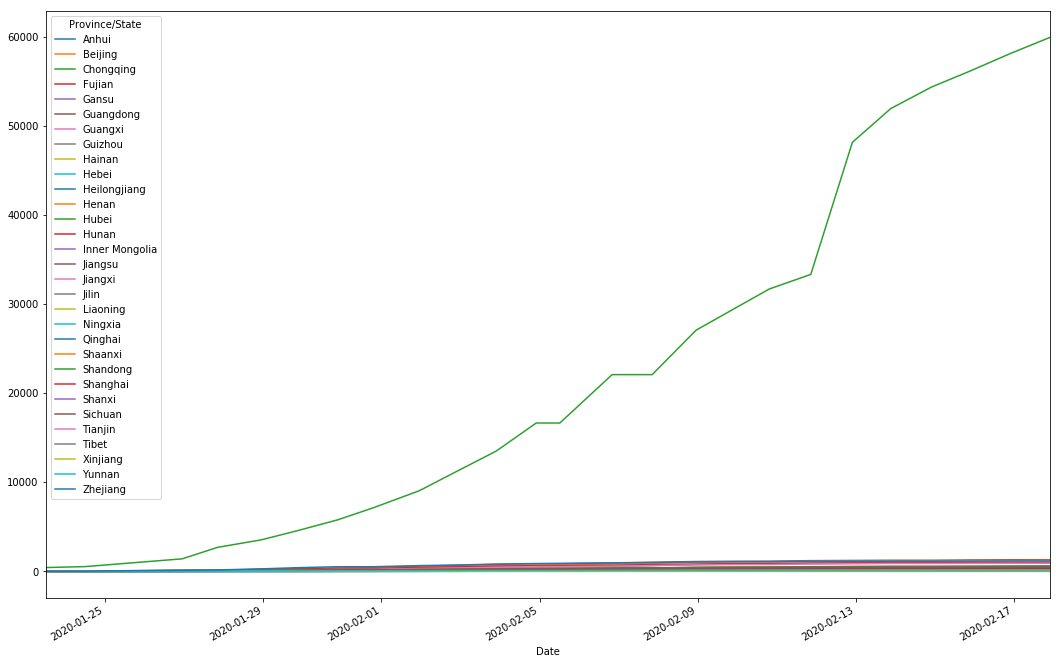

In [18]:
growth_state = pd.pivot_table(data[data['Country']=='Mainland China'], values='Confirmed', columns='Province/State', index='Date')
growth_state.plot(figsize=(18,12))

Country affected on the first day and number of confirmed cases on that date in each country.

In [19]:
initial_country=data[data['Date'] == data['Date'][0]]['Country'].unique()
initial_country

array(['China', 'US', 'Japan', 'Thailand', 'South Korea'], dtype=object)

In [20]:
data[data['Date'] == data['Date'][0]].groupby('Country').sum()['Confirmed']

Country
China          549.0
Japan            2.0
South Korea      1.0
Thailand         2.0
US               1.0
Name: Confirmed, dtype: float64

Total Confirmed, Recovery and Death in each country

In [21]:
global_case_wo_mc = data[data.Country != 'Mainland China'].groupby('Country')['Confirmed','Deaths','Recovered'].max().reset_index()
global_case_wo_mc.head()

,Country,Confirmed,Deaths,Recovered
0,Australia,5.0,0.0,4.0
1,Belgium,1.0,0.0,1.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,1.0,0.0,1.0
4,Canada,5.0,0.0,1.0


In [22]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Confirmed']),
    go.Bar(name='Deaths', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Deaths']),
    go.Bar(name='Recovered', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Recovered']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Total Confirmed, Recovery and Death in each Province/State of Mainland China

In [23]:
mainland_case = data[data['Country']=='Mainland China'].groupby('Province/State')['Confirmed','Deaths','Recovered'].sum().reset_index()
mainland_case.head()

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,13621.0,46.0,1729.0
1,Beijing,5939.0,42.0,876.0
2,Chongqing,8702.0,50.0,1340.0
3,Fujian,4613.0,1.0,614.0
4,Gansu,1424.0,19.0,374.0


In [24]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=mainland_case['Province/State'], y=mainland_case['Confirmed']),
    go.Bar(name='Deaths', x=mainland_case['Province/State'], y=mainland_case['Deaths']),
    go.Bar(name='Recovered', x=mainland_case['Province/State'], y=mainland_case['Recovered']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Death Trend Globally

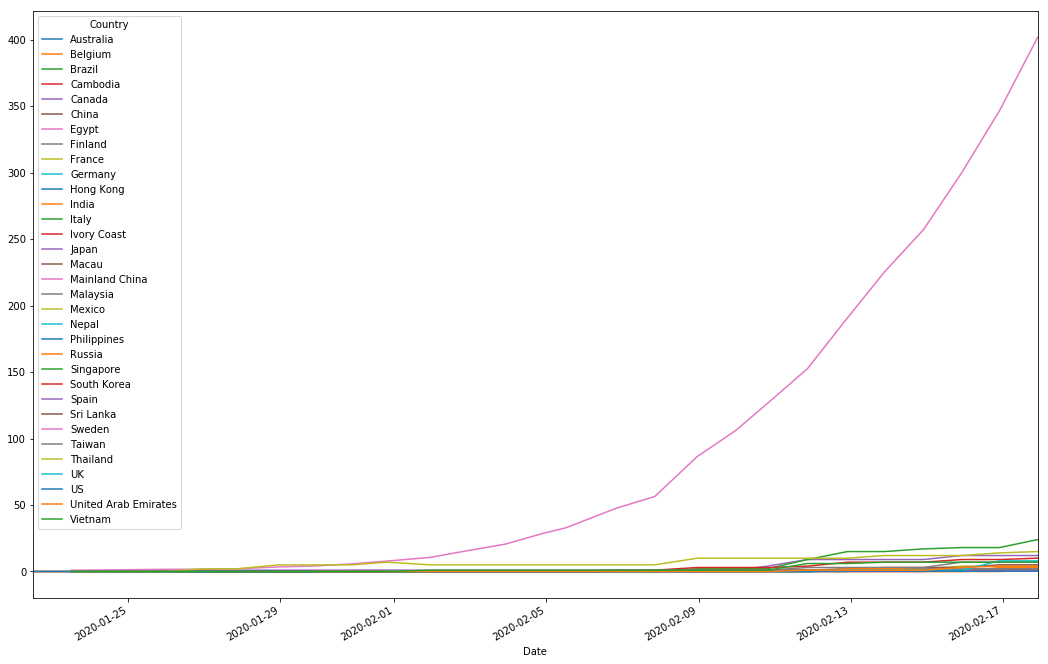

In [25]:
recovery_country = pd.pivot_table(data, values='Recovered', columns='Country', index='Date')
recovery_country.plot(figsize=(18,12))

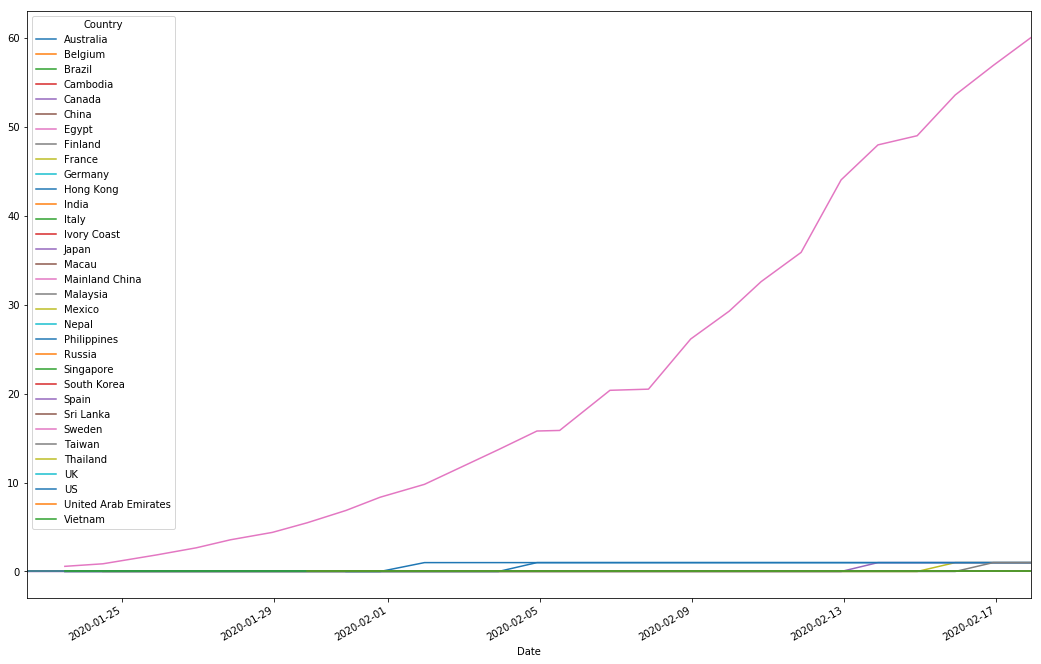

In [26]:
death_country = pd.pivot_table(data, values='Deaths', columns='Country', index='Date')
death_country.plot(figsize=(18,12))

<h3> Confirmed, Recovery and Death globally on world map </h3>

In [27]:
global_case = data.groupby('Country')['Confirmed','Deaths','Recovered'].max().reset_index()
global_case

,Country,Confirmed,Deaths,Recovered
0,Australia,5.0,0.0,4.0
1,Belgium,1.0,0.0,1.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,1.0,0.0,1.0
4,Canada,5.0,0.0,1.0
5,China,444.0,0.0,0.0
6,Egypt,1.0,0.0,0.0
7,Finland,1.0,0.0,1.0
8,France,12.0,1.0,4.0
9,Germany,16.0,0.0,1.0


In [28]:
import folium 
from folium import plugins
world_data = pd.DataFrame({
    'name':list(global_case['Country']),
    'lat':[-25.2744,50.503887,-14.235004,12.565679,56.130366,35.86166,26.820553,61.92411,46.227638,51.165691,22.39643,20.593684,41.87194,-22.49,36.204824,22.198745,39.93,4.210484,23.634501,28.394857,12.879721,61.52401,1.352083,35.907757,40.463669,7.873054,60.128162,23.69781,15.870032,55.378052,37.09024,23.424076,14.058324],
    'lon':[133.7751,4.469936,-51.92528,104.990963,-106.346771,104.195397,30.802498,25.748151,2.213749,10.451526,114.1095,78.96288,12.56738,17.01,138.252924,113.543873,116.38,101.975766,-102.552784,84.124008,121.774017,105.318756,103.819836,127.766922,-3.74922,80.771797,18.643501,120.960515,100.992541,-3.435973,-95.712891,53.847818,108.277199],
    'Confirmed':list(global_case['Confirmed']),
    'Recovered':list(global_case['Recovered']),
    'Deaths':list(global_case['Deaths']),
})

# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.1,tiles='openstreetmap')

for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Confirmed'], world_data['name']):
    if value>1000:
        folium.CircleMarker([lat, lon],
                        radius=value*0.0004,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases as on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
    elif value>100:
        folium.CircleMarker([lat, lon],
                        radius=value*0.02,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases as on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
    elif value<10:
        folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases as on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
    else:
        folium.CircleMarker([lat, lon],
                        radius=value*0.2,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases as on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

In [29]:
world_map = folium.Map(location=[10, -20], zoom_start=2.1,tiles='openstreetmap')
for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Recovered'], world_data['name']):
    if value>0.0:
        folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Recovered Cases as on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='green',
                        
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

In [30]:
world_map = folium.Map(location=[10, -20], zoom_start=2.1,tiles='openstreetmap')

for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Deaths'], world_data['name']):
    if value>0:
        folium.CircleMarker([lat, lon],
                        radius=8,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Death Cases as on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='black',
                        
                        fill_color='black',
                        fill_opacity=0.7 ).add_to(world_map)

In [31]:
import pycountry
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
country_count["iso_alpha"] = country_count['Country'].map(countries.get)

There are some countries whose iso_alpha value is not present and it is returning it as None. Droping those records.

In [32]:
filetered_country=country_count.dropna()
filetered_country.head()

,Country,Confirmed,iso_alpha
0,Australia,5.0,AUS
1,Belgium,1.0,BEL
2,Brazil,0.0,BRA
3,Cambodia,1.0,KHM
4,Canada,5.0,CAN


In [33]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.choropleth(filetered_country, locations="iso_alpha",
                    color='Confirmed',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="natural earth")
fig.show()